# Mall Customer


You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Explore Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [7]:
df.groupby('Gender')['Spending Score (1-100)'].value_counts()

Gender  Spending Score (1-100)
Female  42                        7
        50                        5
        40                        4
        35                        3
        77                        3
                                 ..
Male    17                        1
        11                        1
        9                         1
        8                         1
        3                         1
Name: count, Length: 120, dtype: int64

In [8]:
la=LabelEncoder()

In [9]:
df.Gender  = la.fit_transform(df.Gender)

In [10]:
df.Gender  

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

In [11]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### creat model

In [12]:
clustern = []
j = []

In [13]:
for i in range(1,12):
    model = KMeans(n_clusters= i)
    model.fit(df)
    clustern.append(i)
    j.append(  model.inertia_)

C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [14]:
pd.DataFrame( clustern,j)

,0
975512.060000,1
387065.713771,2
271396.562966,3
195401.198560,4
157179.693358,5
122625.389195,6
103208.122119,7
86119.077481,8
77369.724425,9
68900.885948,10


Text(0, 0.5, 'perc of error')

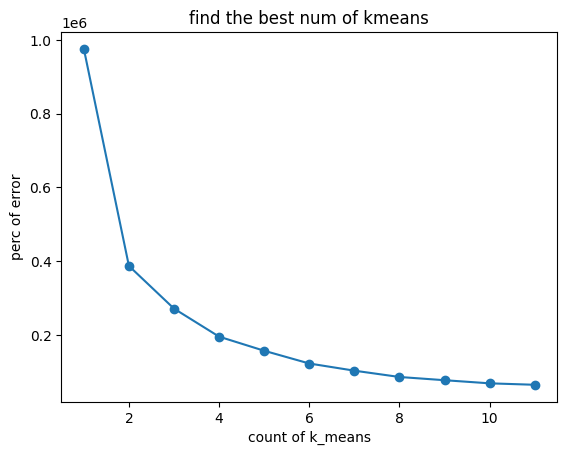

In [15]:
plt.plot(clustern,j,marker = 'o')
plt.title ("find the best num of kmeans")
plt.xlabel("count of k_means")
plt.ylabel("perc of error")

In [16]:
model = KMeans(n_clusters= 4)
model.fit(df)
pre = model.predict(df)


C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
df['k_means'] = pre

In [18]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_means
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,0
197,198,1,32,126,74,3
198,199,1,32,137,18,0


In [19]:
la = StandardScaler()

In [20]:
xdata = la.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [21]:
clustern = []
j = []

In [22]:
for i in range(1,12):
    model = KMeans(n_clusters= i)
    model.fit(df)
    clustern.append(i)
    j.append(  model.inertia_)

C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [23]:
pd.DataFrame( clustern,j)

,0
975711.740000,1
387261.769977,2
271564.483308,3
195394.487179,4
157626.804813,5
122646.505263,6
105106.807522,7
86070.464191,8
76910.473799,9
68936.676383,10


Text(0, 0.5, 'perc of error')

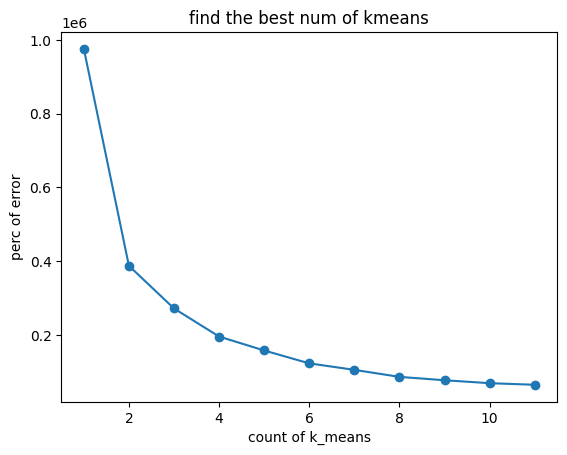

In [24]:
plt.plot(clustern,j,marker = 'o')
plt.title ("find the best num of kmeans")
plt.xlabel("count of k_means")
plt.ylabel("perc of error")

In [25]:
df1 = df[df['k_means'] == 0]
df2 = df[df['k_means'] == 1]
df3 = df[df['k_means'] == 2]
df4 = df[df['k_means'] == 3]

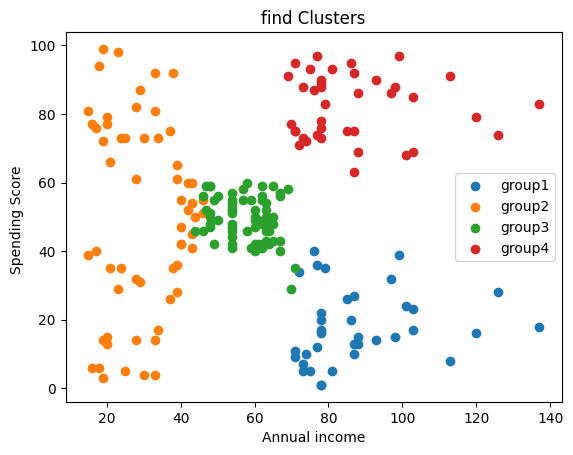

In [26]:
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'] , label = 'group1')	
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'] , label = 'group2')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'] , label = 'group3')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'] , label = 'group4')	
plt.title('find Clusters')
plt.xlabel('Annual income')
plt.ylabel('Spending Score ')
plt.legend()

In [27]:
la = StandardScaler()

In [28]:
xdata = la.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [29]:
clustern = []
j = []

In [30]:
for i in range(1,12):
    xdata = KMeans(n_clusters= i)
    xdata.fit(df)
    clustern.append(i)
    j.append(  xdata.inertia_)

C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [31]:
pd.DataFrame( clustern,j)

,0
975711.740000,1
387261.769977,2
271553.349336,3
195401.198560,4
157145.164702,5
122659.604473,6
103267.233144,7
86042.965074,8
76910.473799,9
69714.586728,10


Text(0, 0.5, 'perc of error')

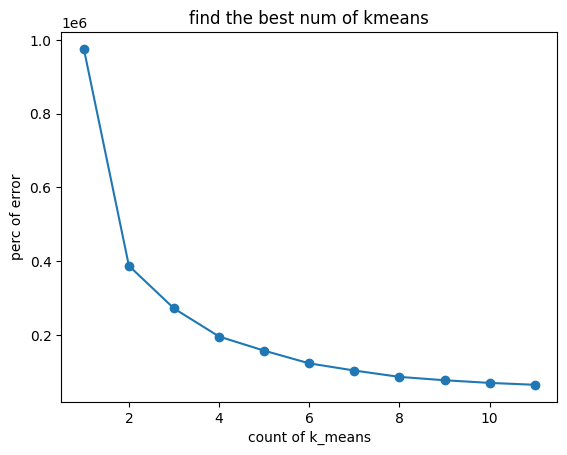

In [32]:
plt.plot(clustern,j,marker = 'o')
plt.title ("find the best num of kmeans")
plt.xlabel("count of k_means")
plt.ylabel("perc of error")

In [33]:
df1 = df[df['k_means'] == 0]
df2 = df[df['k_means'] == 1]
df3 = df[df['k_means'] == 2]
df4 = df[df['k_means'] == 3]

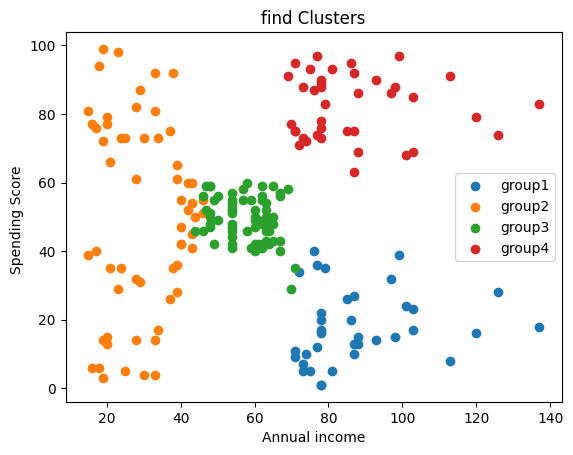

In [34]:
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'] , label = 'group1')	
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'] , label = 'group2')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'] , label = 'group3')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'] , label = 'group4')	
plt.title('find Clusters')
plt.xlabel('Annual income')
plt.ylabel('Spending Score ')
plt.legend()

# Analysis

C:\Users\Abdo\AppData\Local\Temp\ipykernel_7324\4039995419.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = 'k_means',palette='viridis')


<Axes: xlabel='k_means', ylabel='count'>

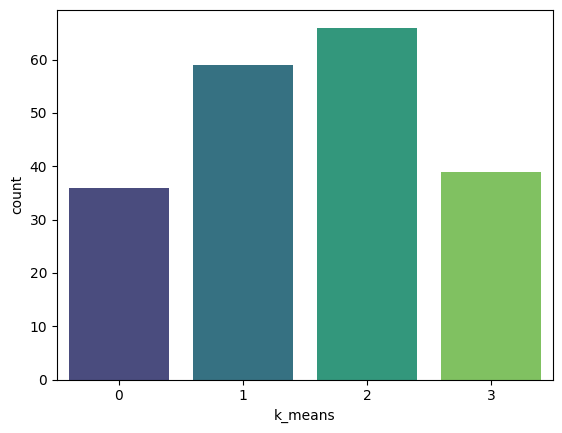

In [35]:
sns.countplot(df, x = 'k_means',palette='viridis')

<Axes: ylabel='count'>

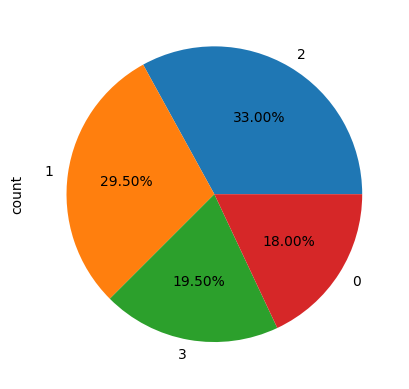

In [36]:
df.k_means.value_counts().plot.pie(autopct = '%0.2f%%')

<Axes: xlabel='Age', ylabel='Count'>

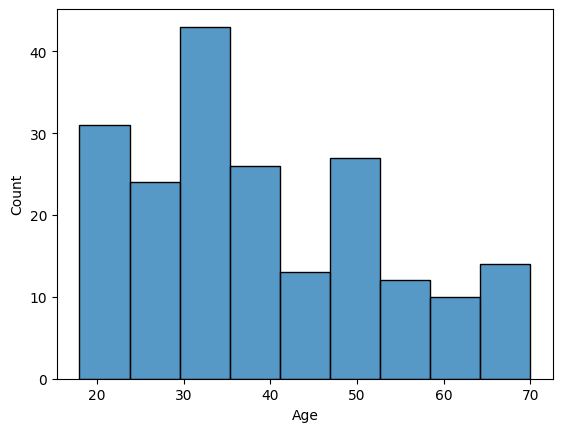

In [37]:
sns.histplot(df.Age)

<Axes: xlabel='k_means', ylabel='count'>

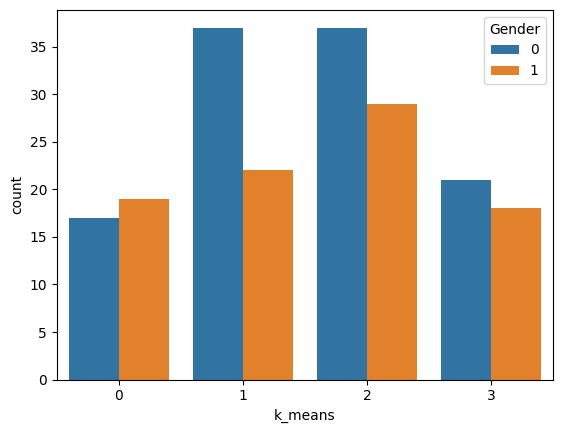

In [38]:
sns.countplot(data = df,x = df['k_means'], hue = df['Gender'])